# Import Preprocessed Data

In [ ]:
#PROJECT_ROOT = "/content/drive/My Drive/CMPT419/Project" #@param ["/content/drive/My Drive/CMPT419/Project", "/content/drive/My Drive/school-419-project"] {allow-input: true}

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')
#%cd {PROJECT_ROOT}

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/CMPT419/Project


In [28]:
# Import Openface's data
import pandas as pd
import os
savename = "aggregated_openface_data.pickle"

openface_csvs = "./openface_processed/multi"

df = pd.DataFrame()

if os.path.isfile(savename):
  print("Loading combined CSV's from file")
  df = pd.read_pickle(savename)
else:
  for root, dirs, files in os.walk(openface_csvs):
    dirs.clear()  # don't recurse

    for f in [f for f in files if f[-4:] == '.csv']:
      tempdata = pd.read_csv(os.path.join(root, f), skipinitialspace=True)
      tempdata["filename"] = f[0:-4].strip()  # make column with sample number (remove .csv suffix, whitespace)
      df = pd.concat([df, tempdata])

  print("Saving combined CSV's to file")
  df.to_pickle(savename)
df.describe()

Loading combined CSV's from file


,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
count,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000,...,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000,22935.000000
mean,155.616133,0.501809,4.605910,0.751813,0.766122,0.036090,0.203211,-0.663631,-0.076915,0.208771,...,0.294790,0.399913,0.581600,0.286767,0.381905,0.208197,0.404229,0.323261,0.406584,0.318552
std,164.296348,0.710695,4.882572,0.367902,0.423305,0.332307,0.171565,0.378508,0.330183,0.175701,...,0.455958,0.489891,0.493307,0.452262,0.485864,0.406027,0.490753,0.467732,0.491207,0.465925
min,1.000000,0.000000,0.000000,0.000000,0.000000,-0.805486,-0.448546,-0.999994,-0.914196,-0.414886,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,1.600000,0.770000,1.000000,-0.196749,0.000000,-0.932839,-0.361876,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,0.000000,3.365000,0.980000,1.000000,0.000000,0.210941,-0.857065,0.000000,0.219472,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,188.000000,1.000000,5.772000,0.980000,1.000000,0.286586,0.324906,-0.578735,0.125412,0.340716,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,837.000000,3.000000,34.868000,0.980000,1.000000,0.931122,0.726961,0.000000,0.893593,0.843826,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# filter out datas with success = 1 or confidence < 0.95
df = df[(df['confidence'] >=0.65) & (df['success'] == 1)]
df.reset_index(drop=True, inplace=True)
# print(df.filename.unique())
# print(len(df.keys()))

In [30]:
# Import audio data
audio_df = pd.read_csv("audio-features.csv").drop("Unnamed: 0", axis=1)
audio_df.head()

,mean_pitch,min_pitch,max_pitch,mean_intensity,root_mean_square,center_of_gravity,kurtosis,skewness,standard_deviation,mean_f1_frequency,mean_f2_frequency,mean_speech_rate,number_of_silent_intervals,filename,estimated_frame_number
0,290.447878,223.029898,420.621402,83.265478,0.291275,629.042192,60.851689,4.878547,475.672620,605.231710,1634.643303,0.49362,2,nonflirt-PJP-C7TCaM8-6,0
1,288.354722,223.129737,420.629276,83.295576,0.292287,630.297852,60.325458,4.840207,476.914570,626.793360,1624.179187,0.49362,2,nonflirt-PJP-C7TCaM8-6,1
2,286.543449,223.243593,420.609286,83.482699,0.298652,662.504028,68.563877,4.773974,496.830745,636.716477,1611.940717,0.49362,2,nonflirt-PJP-C7TCaM8-6,2
3,284.431711,223.167087,420.564528,83.700942,0.306251,683.002668,58.698875,4.373654,499.577060,648.038718,1610.828022,0.49362,2,nonflirt-PJP-C7TCaM8-6,3
4,282.287917,223.092497,420.501990,83.765693,0.308542,681.849847,49.727052,4.123383,495.618783,657.417870,1599.743717,0.49362,2,nonflirt-PJP-C7TCaM8-6,4


In [31]:
# Check datas consistency
clips_name = df.filename.unique()
audios_name = audio_df.filename.unique()
df = df[df['filename'] != 'nonflirt-ImEnWAVRLU0-2']
df = df[df['filename'] != 'nonflirt-v2VgA_MCNDg-4']

# if len(clips_name) != len(audios_name):
#   missing_video = set(audios_name)-set(clips_name)
#   print(missing_video)
missing_audio = set(df.filename.unique())-set(audio_df.filename.unique())
print(missing_audio)
  # df = df[df['filename'] != missing_video.pop()]
  # audio_df = audio_df[audio_df['filename'] != missing_audio]

print(len(df.filename.unique()))
print(len(audio_df.filename.unique()))


set()
103
103


# Compute DTW

In [41]:
# required packages
!pip install fastdtw
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from tqdm import tqdm, trange

/bin/sh: 1: pip: not found


In [33]:
clips = pd.concat([df.loc[:,"filename"], df.loc[:,"frame":"gaze_angle_y"], df.loc[:,"pose_Tx":"pose_Rz"], df.loc[:,"AU01_r":"AU45_c"]],
                  axis=1)

In [34]:
def independent_dtw(clip1, clip2, features):
  overall_score = 0
  clip1 = clip1[~clip1.isin([np.nan, np.inf, -np.inf]).any(1)]
  clip2 = clip2[~clip2.isin([np.nan, np.inf, -np.inf]).any(1)]
  for feature in features:
    if feature != 'filename' and feature != 'frame':
      # print(clip1[feature], clip2[feature])
      distance, path = fastdtw(clip1[feature], clip2[feature], dist=euclidean)
      # print(path)
      overall_score+=distance
  return overall_score

# test
clip1 = clips[clips['filename'] == 'nonflirt-PJP-C7TCaM8-6']
clip2 = clips[clips['filename'] == 'flirt-qkq9k5FewvI-1']
test_dtw1 = independent_dtw(clip1, clip2, clips.columns)
clip1 = audio_df[audio_df['filename'] == 'nonflirt-PJP-C7TCaM8-6']
clip2 = audio_df[audio_df['filename'] == 'flirt-qkq9k5FewvI-1']
test_dtw2 = independent_dtw(clip1, clip2, audio_df.columns)

print(test_dtw1+test_dtw2)

273785.2142364928


In [35]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)


2.8284271247461903


In [36]:
# This would be the final matrix that gives how similar between
# each two clips
def produce_Similarity_Matrix(df, audio_df): # for multimodal
  # This data is missing from OpenFace
  clips_name = df.filename.unique()
  audios_name = audio_df.filename.unique()
  length = len(clips_name)
  features_face = clips.columns
  features_audio = audio_df.columns


  Similarity_Matrix = np.zeros((length,length))
  for col in trange(length, leave=False, position=0):
    for row in trange(length, leave=False, position=0):
      # create a Similarity_Matrix, ie         clip1 clip2 clip3
      #                                 clip1    0    ...   ...
      #                                 clip2   ...    0    ...
      #                                 clip3   ...   ...    0
      clip_name1 = clips_name[col]
      clip1 = clips[clips['filename'] == clip_name1]
      clip_name2 = clips_name[row]
      clip2 = clips[clips['filename'] == clip_name2]
      overall_score1 = independent_dtw(clip1, clip2, features_face)

      clip1 = audio_df[audio_df['filename'] == clip_name1]
      clip2 = audio_df[audio_df['filename'] == clip_name2]
      overall_score2 = independent_dtw(clip1, clip2, features_audio)

      Similarity_Matrix[col][row] = overall_score1+overall_score2
  return Similarity_Matrix

In [37]:
# Suggest not running this if you are to use the same features
# This would take a long time to produce the whole Similarity
# We already provided the final version in our resources
Similarity_Matrix = produce_Similarity_Matrix(df, audio_df)
sm = Similarity_Matrix
print(sm)

KeyboardInterrupt: 

In [38]:
## Save the result
#import pickle
#with open('Similarity_Matrix_total', 'wb') as f:
#    pickle.dump(Similarity_Matrix, f)

In [39]:
# Load the result
import pickle
with open("Similarity_Matrix_total", "rb") as f:
  Similarity_Matrix = pickle.load(f)

# K-Means Clustering

In [46]:
!pip install tslearn
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from collections import defaultdict
from tqdm import tqdm
import pickle

ts_seed = 85510309
ss_seed = 10474245


start, stop = 5, 15

savename = f"kmeans_and_silhouette_score_from_{start}_to_{stop}.pickle"

score_per_run = defaultdict(list)

if os.path.isfile(savename):
  print(f"Loading saved k-means dict and silhouette scores from {savename}")
  with open(savename, 'rb') as f:
    score_per_run = pickle.load(f)
else:
  for i in tqdm(range(start, stop)):
    km = TimeSeriesKMeans(n_clusters=i, metric="dtw", random_state=ts_seed)
    km.fit(Similarity_Matrix)
    ss = silhouette_score(Similarity_Matrix, labels=km.labels_, metric='dtw', random_state=ss_seed)

    score_per_run[i] = [ss, km]

  print(f"Saving {savename}")
  with open(savename, 'wb') as f:
    pickle.dump(score_per_run, f)

/bin/sh: 1: pip: not found


 10%|█         | 1/10 [00:06<00:57,  6.39s/it]


KeyboardInterrupt: 

In [47]:
# print(sorted([3,1,7]))  # sort is ascending
s = sorted(score_per_run, key=lambda k: score_per_run[k][0])  # sort by silhouette score
print(s)
print(f"Best (smallest) silhouette score is with {s[0]} categories")

num_metrics = s[0]

[5]
Best (smallest) silhouette score is with 5 categories


# K-Nearest Neighbours Classification

In [48]:
# import packages
# https://www.saedsayad.com/k_nearest_neighbors.htm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [49]:
def is_flirting(filename):
  return filename.startswith("flirt-")

# label all clips, flirting: 1, non-flirting: 0
# df['Class'] = 0
# df.loc[is_flirting(df['filename'].str), 'Class'] = 1
# print(df['Class'].value_counts())
num_clips = df.filename.unique()

labels = []
for i in range(0, len(num_clips)):
  clip_filename = num_clips[i]
  if is_flirting(clip_filename):
    label = 1
  else:
    label = 0
  labels.append(label)

features = df.keys()
# print(features)
# Split the dataset into train (80%) and test (20%) subsets.
X_train, X_test, y_train, y_test = train_test_split(
    Similarity_Matrix, labels, test_size=0.2, shuffle=False
)

# Create a classifier with k=1
knn = KNeighborsClassifier(n_neighbors=10)

# Train
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('k-NN Accuracy (without Cross-Validation):', knn.score(X_test, y_test))

k-NN Accuracy (without Cross-Validation): 0.6666666666666666


## Dimension Deduction and Visualization

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

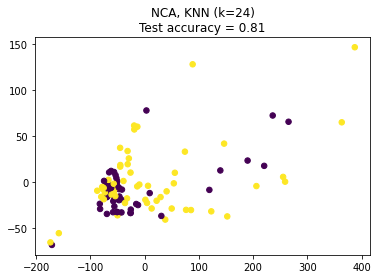

In [51]:
# Reference:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html

np.random.seed(1000)
n_neighbors = 24
random_state = 0

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(Similarity_Matrix, labels, test_size=0.2, stratify=labels,
                     random_state=random_state)

dim = len(Similarity_Matrix[0])
n_classes = 2

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)


name = 'NCA'
model = nca
plt.figure()

# Fit the method's model
model.fit(X_train, y_train)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(model.transform(X_train), y_train)
y_pred = knn.predict(model.transform(X_test))
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(model.transform(X_test), y_test)

# Embed the data set in 2 dimensions using the fitted model
X_embedded = model.transform(Similarity_Matrix)
# Plot the projected points and show the evaluation score
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, s=30)
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                          n_neighbors,
                                                          acc_knn))
plt.show()

In [52]:
for i in range(0, len(y_pred)):
  offset = len(X_train)
  print(y_pred[i], num_clips[offset+i], y_test[i])

1 flirt-qkq9k5FewvI-4 1
1 nonflirt-pNqEDwpIm9-1 1
0 flirt-1 0
1 flirt-True.Blood.S01E02.720p.HDTV.x264-2HD-1 1
0 nonflirt-lyvAjZw6O_Q-10 1
0 nonflirt-PJP-C7TCaM8-6 0
1 nonflirt-v2VgA_MCNDg-0 1
0 flirt-ImEnWAVRLU0-0 1
1 flirt-1v98t9YKPmc-1 1
1 nonflirt-PJP-C7TCaM8-0 1
0 flirt-WAkZz1hV7_c-3 0
0 nonflirt-PJP-C7TCaM8-1 0
0 flirt-5Vl8Wp3aBwQ-1 0
1 nonflirt-2 0
0 nonflirt-Dyri6DRZltk 1
1 flirt-1v98t9YKPmc-2 1
0 flirt-4 0
0 nonflirt-1 0
0 flirt-qUxXbU2ModY-0 0
0 flirt-2 0
1 flirt-True.Blood.S01E01.720p.HDTV.x264-2HD-2 1


Analyzation (note that this is compared to the Clips&Annotation.ipynb): 
1. PJP-C7TCaM8-0  
This is pretty surprising because the boy detected looks totally angry instead of having any intention of doing flirtious action.

2. WAkZz1hV7_c-3  
This is another unexpected results since his head turns right + looks away then back + lip droo + head small movement with smile and also smacking lips. The combinations of these features should give a positive result, label it as a flirting action

3. Dyri6DRZltk  
This one might due to the hand movement and the high picth voice

4. ImEnWAVRLU0-0  
I think that this was predicted as non-flirting because there is no wink or the clip was actually supposed to be labelled as non-flirting.

5. nonflirt-2  
Somewhat surprising because the man with the cellphone's tone of voice is  is agitated. Maybe the model detected the presence of two people in the frame.

6. nonflirt-1  
Somewhat surprising because the child's facial expression seems angry.


# Evaluation

In [53]:
# import packages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
# Train model with a cross-validation (CV) generator with 5 folds. Note: the 
# CV generator uses `sklearn.model_selection.StratifiedKFold`.
# cv_scores = cross_val_score(knn, Similarity_Matrix, labels, cv=5)
cv_scores = cross_val_score(knn, X_embedded, labels, cv=5)

print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:{}'.format(np.mean(cv_scores)))

Cross-Validation Scores: [0.66666667 0.76190476 0.61904762 0.5        0.7       ]
Mean Cross-Validation Score:0.6495238095238095


## Confusion Matrix & Classification Report

In [55]:
# Reference:
# https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[9 1]
 [3 8]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.89      0.73      0.80        11

    accuracy                           0.81        21
   macro avg       0.82      0.81      0.81        21
weighted avg       0.82      0.81      0.81        21



The results show that our KNN algorithm was able to classify all the 21 records in the test set with 81% accuracy, which is very good. Although the algorithm performed very well with this dataset, don't expect the same results with all applications. As noted earlier, KNN doesn't always perform as well with high-dimensionality or categorical features.